# Primera parte: Recoleccion de imagenes satelitales y de datos por banda para cada punto geografico.

In [57]:

import ee
import geemap
import os
import time
import pandas as pd
import csv
import numpy as np
import gdal, ogr, osr
import matplotlib.pyplot as plt

In [58]:
workdir="/home/juanfi/Documentos/diplo_utn/DesafioAgTech2020-master/data/"
train_csv_name = workdir+"data_train.csv"
test_csv_name = workdir+"data_test.csv"


In [59]:
data_train = pd.read_csv('data_train.csv')
#data_train = pd.read_csv('data_train.csv')
data_train['Cultivo'].value_counts()

S      344
M      210
s       89
N       82
P       55
X       34
U       12
R        6
B        6
m        4
A        2
aa       2
T        2
G        1
S/M      1
Name: Cultivo, dtype: int64

In [60]:


data_train_1819 = data_train[data_train['Campania'] == '18/19']

data_train_1920 = data_train[data_train['Campania'] == '19/20']

data_train_1819['Cultivo'].value_counts()

#data_train_1920['Cultivo'].value_counts()

S      155
M       82
N       25
P       10
X        9
R        6
aa       2
G        1
m        1
A        1
S/M      1
s        1
Name: Cultivo, dtype: int64

In [61]:
# Inicializar Google Earth Engine  

ee.Initialize()

In [62]:
gral_lopez  = ee.FeatureCollection('users/juan_EEA/Gral_Lopez')
region = gral_lopez.geometry().getInfo()['coordinates']

## Recolecion de imagen resumen 

In [63]:
# Cada camapaña va desde mayo a abril de cada año. 

# Voy a dividir cada una de las campañas en seis series temporales, 

#mayo-junio
#julio-agosto
#sep-octubre
#nov-dic
#enero-feb
#marzo-abril

# Voy a tener 6 imagenes por campaña 

In [ ]:
#Campaña 18/19


#[['2018-05-01','2018-07-01'],
#['2018-07-01','2018-09-01'],
#['2018-09-01','2018-11-01'],
#['2018-11-01','2019-01-01'],
#['2019-01-01','2019-03-01'],
#['2019-03-01','2019-05-01']]

#Campaña 19/20

#[['2019-05-01','2019-07-01'],
#['2019-07-01','2019-09-01'],
#['2019-09-01','2019-11-01'],
#['2019-11-01','2020-01-01'],
#['2020-01-01','2020-03-01'],
#['2020-03-01','2020-05-01']]



################### - LANDSAT 8 - ##########################
 
#var dataset = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')
#                  .filterDate('2016-01-01', '2016-12-31')
#                  .map(maskL8sr);


#band_names = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7','B10', 'B11']




In [ ]:
band_names = ee.Image(Imagen).bandNames().getInfo()
#band_names = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']

In [108]:
# Parametros para la descarga de las Imagenes desde Google Earth Engine 

collection_grallopez = ('COPERNICUS/S2')
area = ee.Geometry.Polygon(region)

time_range =['2019-03-01','2019-05-01']

In [109]:

# Funcion de descarga

def obtain_image_mean(collection, time_range, area):

    collection = ee.ImageCollection(collection)

    ## Filter by time range and location
    collection_time = collection.filterDate(time_range[0], time_range[1])\
                                .filterMetadata('CLOUDY_PIXEL_PERCENTAGE','less_than', 10)\
                                .select(['B1','B2','B3','B4','B5','B6','B7','B8','B8A','B9', 'B11','B12'])
    image_area = collection_time.filterBounds(area)
    image_mean = image_area.mean()
    return image_mean

         

In [110]:
Imagen= obtain_image_mean(collection_grallopez, time_range, area )

In [111]:
Imagen

In [114]:

# Preproc de coordenadas para posterior descarga de Imagen a Google Drive 

def get_region(geom):
    if isinstance(geom, ee.Geometry):
        region = geom.getInfo()["coordinates"]
    elif isinstance(geom, ee.Feature, ee.Image):
        region = geom.geometry().getInfo()["coordinates"]
    elif isinstance(geom, list):
        condition = all([isinstance(item) == list for item in geom])
        if condition:
            region = geom
    return region

In [115]:
 region_gralopez = get_region(area)

## Descarga de imagen en batch a Google Drive

In [118]:
 params = {
    'description': '20190301_20190501',
    'folder':'Example_folder',
    'scale': 30,
    'fileFormat': 'GeoTIFF',
    'region':region_gralopez
  }
task = ee.batch.Export.image.toDrive(Imagen, **params)
task.start()
while task.active():
        time.sleep(30)
        print(task.status())

{'state': 'RUNNING', 'description': '20190301_20190501', 'creation_timestamp_ms': 1607357383094, 'update_timestamp_ms': 1607357398074, 'start_timestamp_ms': 1607357395179, 'task_type': 'EXPORT_IMAGE', 'id': 'FYSXBRH5L3S4VBLQTLQ5UYGW', 'name': 'projects/earthengine-legacy/operations/FYSXBRH5L3S4VBLQTLQ5UYGW'}
{'state': 'RUNNING', 'description': '20190301_20190501', 'creation_timestamp_ms': 1607357383094, 'update_timestamp_ms': 1607357398074, 'start_timestamp_ms': 1607357395179, 'task_type': 'EXPORT_IMAGE', 'id': 'FYSXBRH5L3S4VBLQTLQ5UYGW', 'name': 'projects/earthengine-legacy/operations/FYSXBRH5L3S4VBLQTLQ5UYGW'}
{'state': 'RUNNING', 'description': '20190301_20190501', 'creation_timestamp_ms': 1607357383094, 'update_timestamp_ms': 1607357455748, 'start_timestamp_ms': 1607357395179, 'task_type': 'EXPORT_IMAGE', 'id': 'FYSXBRH5L3S4VBLQTLQ5UYGW', 'name': 'projects/earthengine-legacy/operations/FYSXBRH5L3S4VBLQTLQ5UYGW'}
{'state': 'RUNNING', 'description': '20190301_20190501', 'creation_tim

# Importar imagen geotif para procesamiento

In [46]:
#  Una vez descargadas las imagenes desde drive a la computador
# Importamos las imagenes para obtener el valor de banda para cada punto GPS en cada campaña

image_name = workdir+"campania1920_nov_mayo.tif"

In [47]:

raster_ds=gdal.Open(image_name) 
raster_gt=raster_ds.GetGeoTransform()


if raster_ds is None:
    print ("Could not open the file!")

print(raster_gt)
print(raster_ds.RasterXSize, raster_ds.RasterYSize)



raster_dataPixel=np.zeros((raster_ds.RasterYSize,raster_ds.RasterXSize,raster_ds.RasterCount,))
for i in range(raster_ds.RasterCount):
    banddataraster = raster_ds.GetRasterBand(i+1)
    raster_dataPixel[:,:,i]= banddataraster.ReadAsArray(0,0, raster_ds.RasterXSize, raster_ds.RasterYSize).astype(np.float)

(-62.87982410015621, 0.00026949458523585647, 0.0, -33.40196737788776, 0.0, -0.00026949458523585647)
6511 3643


In [ ]:

print( "[ RASTER BAND COUNT ]:" , raster_ds.RasterCount)

for band in range( raster_ds.RasterCount ):
    band += 1
    print ("[ GETTING BAND ]: ", band)
    srcband = raster_ds.GetRasterBand(band)
    if srcband is None:
        continue

    stats = srcband.GetStatistics( True, True )
    if stats is None:
        continue

    print ("[ STATS ] =  Minimum=%.3f, Maximum=%.3f, Mean=%.3f, StdDev=%.3f" % ( \
                stats[0], stats[1], stats[2], stats[3] ))

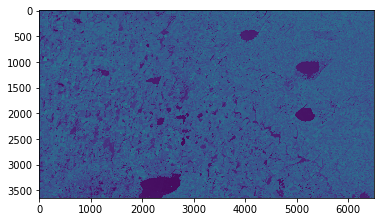

In [99]:
plt.plot() , plt.imshow(raster_dataPixel[:,:,5]*.0001*5)
plt.show()


In [48]:
# Abro los puntos de entreanmiento y de testeo


train_SR = osr.SpatialReference()
train_SR.ImportFromEPSG(4326)
target_SR = osr.SpatialReference()
target_SR.ImportFromWkt(raster_ds.GetProjectionRef())

puntos_train=list()


with open(train_csv_name, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if (row['Campania']=='19/20'):
                point = ogr.Geometry(ogr.wkbPoint)
                point.AddPoint(float(row['Longitud']),float(row['Latitud']))
                coordTrans = osr.CoordinateTransformation(train_SR,target_SR)
                point.Transform(coordTrans)
                transf_x,transf_y=point.GetX(), point.GetY()
                

                px = int((transf_x - raster_gt[0]) / raster_gt[1]) #x pixel
                py = int((transf_y - raster_gt[3]) / raster_gt[5]) #y pixel

                puntos_train.append({'lat':row['Latitud'],'lon':row['Longitud'],'px':px,'py':py,'cultivo':row['Cultivo'],'camp':row['Campania']})



In [50]:
# Obtengo los valores de los pixeles

valores_pixeles_entrenamiento = np.asarray([raster_dataPixel[d['py'],d['px'],:]   for d in puntos_train])
clase_entrenamiento = [d['cultivo'] for d in puntos_train]

In [52]:
valores_pixeles_entrenamiento

df1 = pd.DataFrame(data=valores_pixeles_entrenamiento, columns=band_names)
df1

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12
0,443.300000,547.766667,844.400000,885.333333,1392.966667,2956.200000,3568.700000,3731.333333,3895.066667,3937.000000,3028.200000,1999.200000
1,507.566667,646.500000,932.400000,1070.933333,1515.200000,2840.566667,3419.700000,3598.633333,3734.233333,3761.800000,3143.866667,2255.166667
2,374.366667,457.133333,701.800000,738.366667,1176.100000,2209.333333,2605.233333,2771.100000,2907.266667,2790.766667,2655.200000,1882.833333
3,476.166667,576.666667,828.866667,874.500000,1314.666667,2723.600000,3286.733333,3435.200000,3575.866667,3634.400000,3024.633333,2103.833333
4,341.466667,485.600000,819.333333,842.033333,1383.833333,2810.433333,3363.366667,3481.633333,3647.733333,3761.300000,2513.966667,1469.100000
...,...,...,...,...,...,...,...,...,...,...,...,...
551,1093.600000,2133.933333,2373.600000,2440.066667,2642.733333,3304.600000,3585.533333,3679.333333,3684.133333,3423.600000,3440.733333,2921.333333
552,260.258065,372.225806,598.096774,383.483871,717.548387,437.774194,425.903226,385.322581,305.193548,182.451613,166.612903,143.838710
553,318.533333,366.933333,485.066667,422.800000,669.133333,520.266667,538.066667,482.466667,398.400000,244.200000,154.133333,120.733333
554,500.733333,582.666667,702.466667,810.266667,902.000000,753.866667,786.133333,710.933333,607.866667,313.266667,182.200000,161.733333


In [53]:
result = pd.concat([df, df1], axis=1)


# Calculo de Indices

In [55]:
### CAlculo de Indices 


result['ARI'] = ( 1.0 /result['B3'])-( 1.0/result['B5'])
result['ARVI'] =( (result['B9']-result['B4'])-(0.106*(result['B4']-result['B2'])))/( (result['B9']+result['B4'])-(0.106*(result['B4']-result['B2'])))
result['CHL-RED-EDGE'] = (result['B7']**-1.0)/result['B5']
result['EVI'] = 2.5*((result['B8']-result['B4'])/(result['B8']+(result['B4']*6.0)-(7.5*result['B2'])+1))
result['EVI2'] = 2.4*((result['B8']-result['B4'])/(result['B8']-result['B4'] +1.0)) 
result['GNDVI'] =(result['B8']-result['B3'])/( result['B8']+result['B3'])
result['MCARI'] = ((result['B5']-result['B4'])-(0.2*(result['B5']-result['B3'])))*(result['B5']/result['B4'])
result['MSI'] = result['B11']/result['B8']
result['NBR'] =( result['B8']-result['B12'])/( result['B8']+result['B12'])
result['NDII'] =( result['B8']-result['B11'])/( result['B8']+result['B11'])
result['NDVI'] =( result['B8']-result['B4'])/( result['B8']+result['B4'])
result['NDWI'] =( result['B3']-result['B8'])/( result['B3']+result['B8'])
result['PSSR'] = result['B8']/result['B4']
result['SAVI'] =((result['B8']-result['B4'])/( result['B8']+result['B4']+0.5))*(1.0+0.5)
result['SIPI'] =( result['B8']-result['B1'])/( result['B8']-result['B4'])


In [56]:
#campaña_1819_mayo_nov =  result
#campaña_1819_nov_mayo =  result
#campaña_1920_mayo_nov =  result
campaña_1920_nov_mayo =  result

In [57]:
#campaña_1819_mayo_nov= campaña_1819_mayo_nov.drop(band_names, axis=1)
#campaña_1819_mayo_nov.head(10)


#campaña_1819_nov_mayo= campaña_1819_nov_mayo.drop(band_names, axis=1)
#campaña_1819_nov_mayo.head(10)

#campaña_1920_mayo_nov= campaña_1920_mayo_nov.drop(band_names, axis=1)
#campaña_1920_mayo_nov.head(10)

campaña_1920_nov_mayo= campaña_1920_nov_mayo.drop(band_names, axis=1)
campaña_1920_nov_mayo.head(10)

,lat,lon,px,py,cultivo,camp,ARI,ARVI,CHL-RED-EDGE,EVI,...,GNDVI,MCARI,MSI,NBR,NDII,NDVI,NDWI,PSSR,SAVI,SIPI
0,-33.5994981626966,-61.89829046800678,3642,732,X,19/20,0.000466,0.630075,2.011635e-07,1.441426,...,0.630923,626.079777,0.811560,0.302264,0.104021,0.616462,-0.630923,4.214608,0.924593,1.155317
1,-33.592631250669825,-61.89509476200511,3653,707,S,19/20,0.000413,0.552635,1.929932e-07,1.220761,...,0.588438,463.652709,0.873628,0.229503,0.067448,0.541314,-0.588438,3.360278,0.811883,1.222877
2,-33.5885417062615,-61.90648814861971,3611,692,X,19/20,0.000575,0.577995,3.263692e-07,1.346609,...,0.595842,546.142378,0.958175,0.190864,0.021359,0.579214,-0.595842,3.753013,0.868698,1.179069
3,-33.62996830822912,-61.87508686355997,3728,846,X,19/20,0.000446,0.609365,2.314301e-07,1.468898,...,0.611232,515.654009,0.880482,0.240361,0.063557,0.594171,-0.611232,3.928188,0.891154,1.155556
4,-33.618938588145134,-61.88337717333238,3697,805,X,19/20,0.000498,0.631136,2.148533e-07,1.348707,...,0.619000,704.872471,0.722065,0.406512,0.161396,0.610500,-0.619000,4.134793,0.915645,1.189637
5,-33.61465744232179,-61.88606341895696,3687,789,M,19/20,0.000455,0.598433,2.228770e-07,1.427889,...,0.612624,519.696820,0.877694,0.236127,0.065136,0.589010,-0.612624,3.866301,0.883415,1.141072
6,-33.61153322872211,-61.87990357985233,3710,777,S,19/20,0.000445,0.636659,2.087366e-07,1.563088,...,0.629391,621.586025,0.845960,0.261086,0.083447,0.625567,-0.629391,4.341404,0.938247,1.129839
7,-33.60586307036931,-61.884905554463614,3691,756,M,19/20,0.000503,0.583877,3.314333e-07,1.274020,...,0.588994,418.578938,0.929507,0.239374,0.036534,0.568880,-0.588994,3.639082,0.853200,1.203513
8,-33.56017962780671,-61.92010463506155,3561,587,S,19/20,0.000413,0.441267,2.278888e-07,1.140658,...,0.545756,492.839927,0.947869,0.211561,0.026763,0.501950,-0.545756,3.015657,0.752835,1.245824
9,-33.55508504306499,-61.920243578800736,3560,568,S,19/20,0.000417,0.586487,1.797976e-07,1.318220,...,0.611428,557.771454,0.828661,0.283903,0.093697,0.580433,-0.611428,3.766819,0.870560,1.182704


### Construccion de data frame con datos de las diferentes campañas

In [34]:
# Campaña 18/19
campaña_18_19 = campaña_1819_mayo_nov.merge(campaña_1819_nov_mayo, left_index=True, right_index=True)

In [58]:
# Campaña 19/20
campaña_19_20 = campaña_1920_mayo_nov.merge(campaña_1920_nov_mayo, left_index=True, right_index=True)
campaña_19_20

,lat_x,lon_x,px_x,py_x,cultivo_x,camp_x,ARI_x,ARVI_x,CHL-RED-EDGE_x,EVI_x,...,GNDVI_y,MCARI_y,MSI_y,NBR_y,NDII_y,NDVI_y,NDWI_y,PSSR_y,SAVI_y,SIPI_y
0,-33.5994981626966,-61.89829046800678,3642,732,X,19/20,0.000364,0.227503,2.571654e-07,0.373065,...,0.630923,626.079777,0.811560,0.302264,0.104021,0.616462,-0.630923,4.214608,0.924593,1.155317
1,-33.592631250669825,-61.89509476200511,3653,707,S,19/20,0.000380,0.228294,2.585843e-07,0.397518,...,0.588438,463.652709,0.873628,0.229503,0.067448,0.541314,-0.588438,3.360278,0.811883,1.222877
2,-33.5885417062615,-61.90648814861971,3611,692,X,19/20,0.000545,0.481513,3.166392e-07,1.057769,...,0.595842,546.142378,0.958175,0.190864,0.021359,0.579214,-0.595842,3.753013,0.868698,1.179069
3,-33.62996830822912,-61.87508686355997,3728,846,X,19/20,0.000389,0.288926,3.482555e-07,0.566947,...,0.611232,515.654009,0.880482,0.240361,0.063557,0.594171,-0.611232,3.928188,0.891154,1.155556
4,-33.618938588145134,-61.88337717333238,3697,805,X,19/20,0.000585,0.715205,3.099944e-07,1.779808,...,0.619000,704.872471,0.722065,0.406512,0.161396,0.610500,-0.619000,4.134793,0.915645,1.189637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,-33.59913933731053,-61.60778623224877,4720,731,U,19/20,0.000070,0.116624,1.387639e-07,1.018536,...,0.215719,161.202329,0.935151,0.114837,0.033511,0.202514,-0.215719,1.507882,0.303747,2.086503
552,-34.322219084543065,-62.245215295149706,2354,3414,N,19/20,0.000568,-0.384445,5.180877e-06,4.501689,...,-0.216362,580.376410,0.432398,0.456352,0.396259,0.002392,0.216362,1.004795,0.003585,68.017544
553,-33.94774786866918,-61.48081739440721,5191,2025,N,19/20,0.001138,-0.679084,5.714214e-06,0.173364,...,-0.002687,331.591334,0.319469,0.599691,0.515761,0.065911,0.002687,1.141123,0.098811,2.747486
554,-33.70638984681392,-61.470678891817386,5228,1129,N,19/20,0.000507,-0.882602,2.772744e-06,-0.340161,...,0.005990,57.694158,0.256283,0.629335,0.591998,-0.065299,-0.005990,0.877407,-0.097917,-2.116107


In [59]:
# Unir df de las dos campañas 

datos_campañas_train = pd.concat([campaña_18_19, campaña_19_20], axis=0)
datos_campañas_train

,lat_x,lon_x,px_x,py_x,cultivo_x,camp_x,ARI_x,ARVI_x,CHL-RED-EDGE_x,EVI_x,...,GNDVI_y,MCARI_y,MSI_y,NBR_y,NDII_y,NDVI_y,NDWI_y,PSSR_y,SAVI_y,SIPI_y
0,-33.5994981626966,-61.89829046800678,3642,732,X,19/20,0.000430,0.334618,2.751234e-07,0.601064,...,0.537409,348.835735,1.041895,0.179558,-0.020518,0.458158,-0.537409,2.691116,0.687141,1.416088
1,-33.592631250669825,-61.89509476200511,3653,707,S,19/20,0.000512,0.425828,3.149238e-07,0.761174,...,0.658113,417.732997,0.774053,0.374601,0.127362,0.633394,-0.658113,4.455444,0.949942,1.203473
2,-33.5885417062615,-61.90648814861971,3611,692,X,19/20,0.000597,0.610312,2.531982e-07,1.321418,...,0.705131,715.965319,0.701914,0.396286,0.175148,0.694800,-0.705131,5.553071,1.042087,1.132860
3,-33.62996830822912,-61.87508686355997,3728,846,X,19/20,0.000498,0.506890,2.681863e-07,1.018953,...,0.670114,756.987558,0.758501,0.368690,0.137332,0.652287,-0.670114,4.751873,0.978318,1.172374
4,-33.618938588145134,-61.88337717333238,3697,805,X,19/20,0.000618,0.703625,2.465185e-07,1.593170,...,0.690026,801.592211,0.737951,0.382831,0.150781,0.678792,-0.690026,5.226492,1.018079,1.147794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,-33.59913933731053,-61.60778623224877,4720,731,U,19/20,0.000070,0.116624,1.387639e-07,1.018536,...,0.215719,161.202329,0.935151,0.114837,0.033511,0.202514,-0.215719,1.507882,0.303747,2.086503
552,-34.322219084543065,-62.245215295149706,2354,3414,N,19/20,0.000568,-0.384445,5.180877e-06,4.501689,...,-0.216362,580.376410,0.432398,0.456352,0.396259,0.002392,0.216362,1.004795,0.003585,68.017544
553,-33.94774786866918,-61.48081739440721,5191,2025,N,19/20,0.001138,-0.679084,5.714214e-06,0.173364,...,-0.002687,331.591334,0.319469,0.599691,0.515761,0.065911,0.002687,1.141123,0.098811,2.747486
554,-33.70638984681392,-61.470678891817386,5228,1129,N,19/20,0.000507,-0.882602,2.772744e-06,-0.340161,...,0.005990,57.694158,0.256283,0.629335,0.591998,-0.065299,-0.005990,0.877407,-0.097917,-2.116107


### Exportar df para siguiente etapa de anàlisis 

In [60]:
datos_campañas_train.to_csv('datos_campañas_train_unpix.csv', sep='\t')

In [5]:
datos_campañas_train = pd.read_csv('datos_campañas_train.csv', sep='\t')